In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [2]:
ansur_female = pd.read_csv('ansur_female.csv')
ansur_female.head(2)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal


In [3]:
ansur_male = pd.read_csv('ansur_male.csv')
ansur_male.head(2)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240.0,440.0,1054.0,175.0,853.0,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225.0,371.0,1054.0,167.0,815.0,72.6,1.702,25.062103,Overweight,Normal


In [4]:
ansur_male.shape, ansur_female.shape

((3282, 99), (1986, 99))

In [5]:
ansur_df = pd.concat([ansur_male, ansur_female])

In [6]:
ansur_df = ansur_df[['Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight']]

In [7]:
ansur_df.dropna(inplace=True)

In [9]:
# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

In [10]:
X = ansur_df.drop('Gender', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1581 rows in test set vs. 3686 in training set. 91 Features.


### Fitting and testing the model

In [13]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

In [15]:
print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

99.0% accuracy on test set vs. 98.9% on training set


### Accuracy after dimensionality reduction

In [16]:
X = ansur_df[['neckcircumferencebase']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

In [18]:
print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

93.6% accuracy on test set vs. 92.8% on training set


### Finding a good variance threshold

In [19]:
reduced = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]

In [ ]:
reduced['measurement_error'] = 0.1

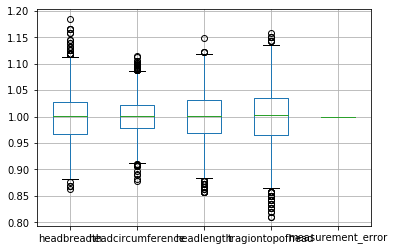

In [21]:
normalized_df = reduced / reduced.mean()

normalized_df.boxplot()
plt.show()

In [22]:
normalized_df.var()

headbreadth          1.715409e-03
headcircumference    1.076714e-03
headlength           1.966887e-03
tragiontopofhead     2.732897e-03
measurement_error    5.784743e-27
dtype: float64

### Features with low variance

In [23]:
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(reduced / reduced.mean())

VarianceThreshold(threshold=0.001)

In [24]:
# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = reduced.loc[:, mask]

In [25]:
print("Dimensionality reduced from {} to {}.".format(reduced.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 5 to 4.


### Correlations

In [28]:
ansur_corr = ansur_df[['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']]

In [29]:
ansur_corr.columns = ['Elbow rest height', 'Wrist circumference', 'Ankle circumference', 'Buttock height', 'Crotch height']

In [34]:
corr_ = ansur_corr.corr()

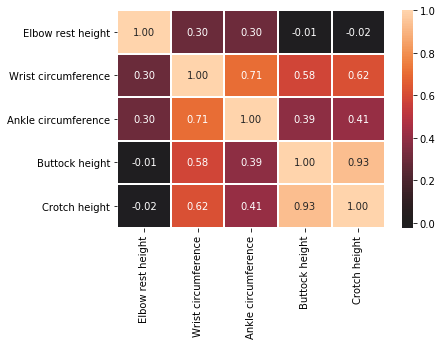

In [36]:
sns.heatmap(corr_, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

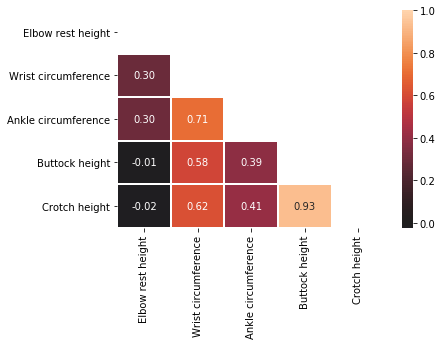

In [41]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(corr_, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()